# Import libraries and data

Fb Prophet library is an open-source library designed for making forecasts for univariate time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default.

In [1]:
import pandas as pd

In [2]:
df= pd.read_excel(  r'C:\Users\MMM-SM\21Pypractice\project\DEXINUS.xls', skiprows=10, parse_dates=True)

In [3]:
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [4]:
df['DEXINUS'].fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12649 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Facebook Prophet predicts data only when it is in a certain format. The dataframe with the data should have column saved as ds for time series data and y for the data to be forecasted. Here, the time series is the column 'Date' and the data to be forecasted is the column 'DEXINUS'. So let’s make a new dataframe with new column names and the same data. Also, ds should be in a datetime format.

In [5]:
#prepare expected column names
df=df.rename(columns={'observation_date':'ds','DEXINUS':'y'})
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [6]:
df.shape

(12649, 2)

In [7]:
from pandas import to_datetime

In [8]:
df['ds']= to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [10]:
start_date = '1990-01-01'
end_date = '2021-06-25'

In [11]:
removed_df = (df['ds'] >= start_date ) & (df['ds'] <= end_date)

In [12]:
removed_df

0        False
1        False
2        False
3        False
4        False
         ...  
12644     True
12645     True
12646     True
12647     True
12648     True
Name: ds, Length: 12649, dtype: bool

In [13]:
df=df.loc[removed_df]
df

,ds,y
4434,1990-01-01,16.96
4435,1990-01-02,16.96
4436,1990-01-03,16.99
4437,1990-01-04,16.94
4438,1990-01-05,16.93
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [14]:
df.ds = pd.to_datetime(df.ds)
df.set_index('ds', inplace=True)

In [15]:
df.head()

,y
ds,
1990-01-01,16.96
1990-01-02,16.96
1990-01-03,16.99
1990-01-04,16.94
1990-01-05,16.93


In [16]:
split_date = '2019-06-24'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()

In [17]:
train.head()

,y
ds,
1990-01-01,16.96
1990-01-02,16.96
1990-01-03,16.99
1990-01-04,16.94
1990-01-05,16.93


In [18]:
train.tail()

,y
ds,
2019-06-18,69.60
2019-06-19,69.64
2019-06-20,69.44
2019-06-21,69.59
2019-06-24,69.32


In [19]:
test.head()

,y
ds,
2019-06-25,69.26
2019-06-26,69.18
2019-06-27,69.01
2019-06-28,68.92
2019-07-01,68.87


In [20]:
train.shape,test.shape

((7691, 1), (524, 1))

In [21]:
# Format data for prophet model using ds and y
train.reset_index() \
    .rename(columns={'observation_date':'ds',
                     'DEXINUS':'y'}).head()

,ds,y
0,1990-01-01,16.96
1,1990-01-02,16.96
2,1990-01-03,16.99
3,1990-01-04,16.94
4,1990-01-05,16.93


In [22]:
# Format data for prophet model using ds and y
train.reset_index() \
    .rename(columns={'observation_date':'ds',
                     'DEXINUS':'y'}).tail()

,ds,y
7686,2019-06-18,69.60
7687,2019-06-19,69.64
7688,2019-06-20,69.44
7689,2019-06-21,69.59
7690,2019-06-24,69.32


In [23]:
# Format data for prophet model using ds and y
test.reset_index() \
    .rename(columns={'observation_date':'ds',
                     'DEXINUS':'y'}).head()

,ds,y
0,2019-06-25,69.26
1,2019-06-26,69.18
2,2019-06-27,69.01
3,2019-06-28,68.92
4,2019-07-01,68.87


In [24]:
# Format data for prophet model using ds and y
test.reset_index() \
    .rename(columns={'observation_date':'ds',
                     'DEXINUS':'y'}).tail()

,ds,y
519,2021-06-21,74.18
520,2021-06-22,74.37
521,2021-06-23,74.13
522,2021-06-24,74.14
523,2021-06-25,74.14


In [25]:
import fbprophet

In [26]:
from fbprophet import Prophet

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Model building using hyper parameter prior scale

## prior scale 0.05

In [28]:
# Setup and train model and fit
model = Prophet()
model.fit(train.reset_index() \
              .rename(columns={'observation_date':'ds',
                               'DEXINUS':'y'}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
test_fcst = model.predict(df=test.reset_index() \
                          .rename(columns={'observation_date':'ds',
                                           'DEXINUS':'y'}))

In [30]:
test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-25,70.293855,68.668715,72.061552,70.293855,70.293855,-0.022560,-0.022560,-0.022560,-0.003834,-0.003834,-0.003834,-0.018727,-0.018727,-0.018727,0.0,0.0,0.0,70.271295
1,2019-06-26,70.298569,68.642750,71.913372,70.298569,70.298569,-0.014040,-0.014040,-0.014040,-0.010381,-0.010381,-0.010381,-0.003659,-0.003659,-0.003659,0.0,0.0,0.0,70.284529
2,2019-06-27,70.303283,68.664677,71.820710,70.303283,70.303283,0.001647,0.001647,0.001647,-0.009400,-0.009400,-0.009400,0.011047,0.011047,0.011047,0.0,0.0,0.0,70.304930
3,2019-06-28,70.307997,68.602671,71.958397,70.307997,70.307997,-0.004475,-0.004475,-0.004475,-0.029662,-0.029662,-0.029662,0.025188,0.025188,0.025188,0.0,0.0,0.0,70.303522
4,2019-07-01,70.322139,68.845013,71.999580,70.322139,70.322139,0.049224,0.049224,0.049224,-0.013037,-0.013037,-0.013037,0.062261,0.062261,0.062261,0.0,0.0,0.0,70.371363


In the above table ds, as we know, is the time series data. yhat is the prediction, yhat_lower and yhat_upper are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels)

In [31]:
test_fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
519,2021-06-21,73.720920,66.957570,82.157860,67.177227,81.966420,-0.084431,-0.084431,-0.084431,-0.013037,-0.013037,-0.013037,-0.071394,-0.071394,-0.071394,0.0,0.0,0.0,73.636489
520,2021-06-22,73.725634,66.387871,82.312853,67.170213,81.971259,-0.060474,-0.060474,-0.060474,-0.003834,-0.003834,-0.003834,-0.056641,-0.056641,-0.056641,0.0,0.0,0.0,73.665160
521,2021-06-23,73.730348,66.498010,82.323603,67.163199,81.985271,-0.051938,-0.051938,-0.051938,-0.010381,-0.010381,-0.010381,-0.041557,-0.041557,-0.041557,0.0,0.0,0.0,73.678410
522,2021-06-24,73.735062,66.991155,82.009643,67.156185,82.013213,-0.035732,-0.035732,-0.035732,-0.009400,-0.009400,-0.009400,-0.026332,-0.026332,-0.026332,0.0,0.0,0.0,73.699330
523,2021-06-25,73.739776,66.822544,82.115275,67.149171,82.041156,-0.040823,-0.040823,-0.040823,-0.029662,-0.029662,-0.029662,-0.011161,-0.011161,-0.011161,0.0,0.0,0.0,73.698953


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=test['y'],y_pred=test_fcst['yhat'])

1.804402567283352

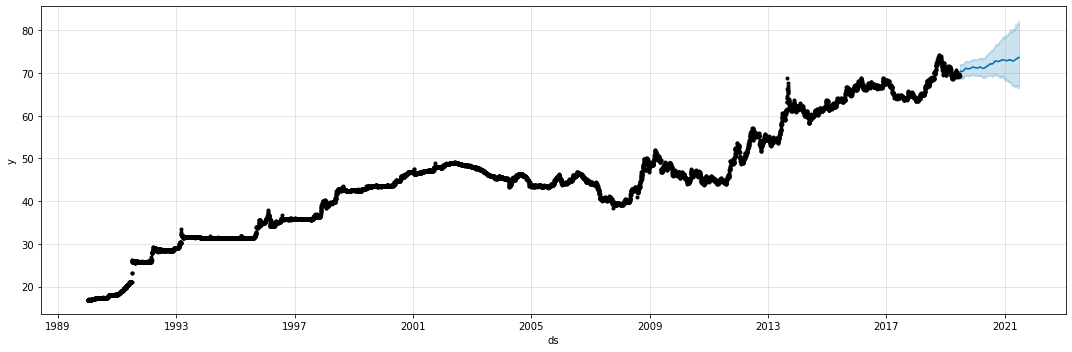

In [33]:
# Plot the forecast
#prior scale 0.05
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_fcst,
                 ax=ax)
plt.show()

## Prediction on future data with prior scale 0.05

In [34]:
df=df.reset_index()
df.head()

,ds,y
0,1990-01-01,16.96
1,1990-01-02,16.96
2,1990-01-03,16.99
3,1990-01-04,16.94
4,1990-01-05,16.93


In [35]:
model_= Prophet()
model_.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future_global=model_.make_future_dataframe(periods=30,freq='D')

In [37]:
prediction=model_.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,16.635797,14.859102,18.352980,16.635797,16.635797,-0.010131,-0.010131,-0.010131,-0.049998,-0.049998,-0.049998,0.039866,0.039866,0.039866,0.0,0.0,0.0,16.625666
1,1990-01-02,16.641314,14.953746,18.295349,16.641314,16.641314,-0.008074,-0.008074,-0.008074,-0.040976,-0.040976,-0.040976,0.032902,0.032902,0.032902,0.0,0.0,0.0,16.633240
2,1990-01-03,16.646830,14.907941,18.285399,16.646830,16.646830,-0.022023,-0.022023,-0.022023,-0.047448,-0.047448,-0.047448,0.025425,0.025425,0.025425,0.0,0.0,0.0,16.624807
3,1990-01-04,16.652346,14.840146,18.232253,16.652346,16.652346,-0.030136,-0.030136,-0.030136,-0.047561,-0.047561,-0.047561,0.017424,0.017424,0.017424,0.0,0.0,0.0,16.622210
4,1990-01-05,16.657862,14.923408,18.336565,16.657862,16.657862,-0.057561,-0.057561,-0.057561,-0.066466,-0.066466,-0.066466,0.008905,0.008905,0.008905,0.0,0.0,0.0,16.600301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,2021-07-21,74.594894,72.744678,76.108253,74.594894,74.594894,-0.086955,-0.086955,-0.086955,-0.047448,-0.047448,-0.047448,-0.039507,-0.039507,-0.039507,0.0,0.0,0.0,74.507939
8241,2021-07-22,74.599839,72.725566,76.439375,74.599839,74.599839,-0.093997,-0.093997,-0.093997,-0.047561,-0.047561,-0.047561,-0.046437,-0.046437,-0.046437,0.0,0.0,0.0,74.505842
8242,2021-07-23,74.604784,72.985690,76.212872,74.604784,74.604784,-0.118560,-0.118560,-0.118560,-0.066466,-0.066466,-0.066466,-0.052093,-0.052093,-0.052093,0.0,0.0,0.0,74.486224
8243,2021-07-24,74.609729,72.940565,76.353265,74.609729,74.609729,0.069869,0.069869,0.069869,0.126224,0.126224,0.126224,-0.056355,-0.056355,-0.056355,0.0,0.0,0.0,74.679598


In [38]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8240,2021-07-21,74.507939,72.744678,76.108253
8241,2021-07-22,74.505842,72.725566,76.439375
8242,2021-07-23,74.486224,72.985690,76.212872
8243,2021-07-24,74.679598,72.940565,76.353265
8244,2021-07-25,74.681777,72.995887,76.317021


In [39]:
from fbprophet.plot import add_changepoints_to_plot

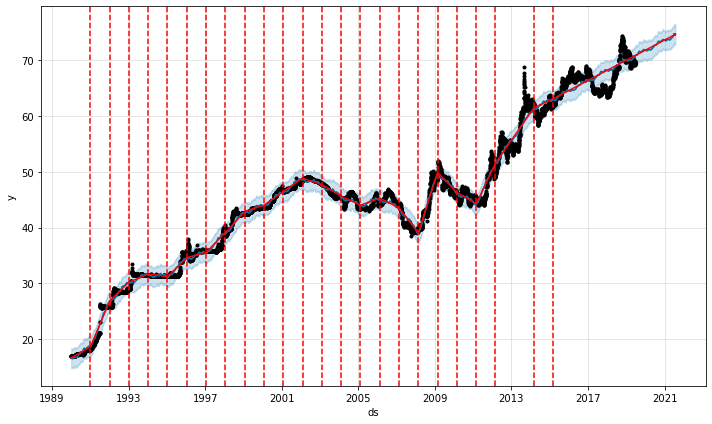

In [40]:
fig=model.plot(prediction)
a=add_changepoints_to_plot(fig.gca(),model_,prediction)

In [41]:
model_.changepoints

263    1991-01-03
526    1992-01-07
789    1993-01-08
1051   1994-01-11
1314   1995-01-13
1577   1996-01-17
1840   1997-01-20
2103   1998-01-22
2366   1999-01-26
2628   2000-01-27
2891   2001-01-30
3154   2002-02-01
3417   2003-02-05
3680   2004-02-09
3943   2005-02-10
4205   2006-02-13
4468   2007-02-15
4731   2008-02-19
4994   2009-02-20
5257   2010-02-24
5520   2011-02-28
5782   2012-02-29
6045   2013-03-04
6308   2014-03-06
6571   2015-03-10
Name: ds, dtype: datetime64[ns]

## Plotting prediction vs actuals 

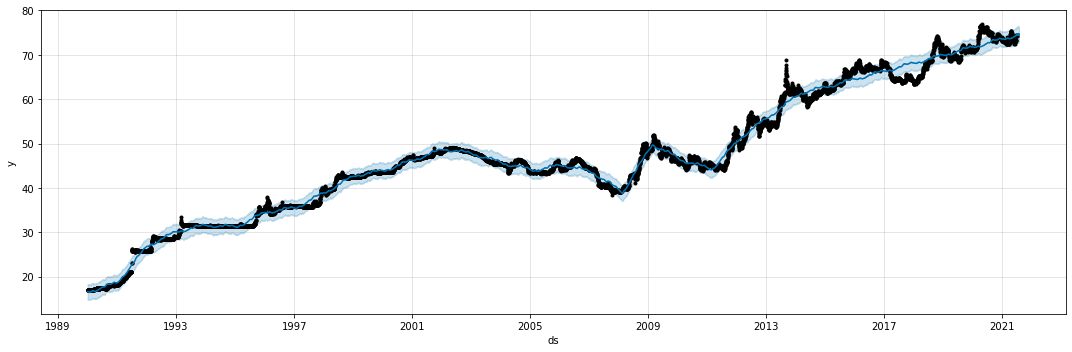

In [42]:
# Plot the forecast
#prior scale 0.05
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_.plot(prediction,
                 ax=ax)
plt.show()

The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data. In the last 30 daya, there is no “actual” data, but looking at the performance of our model in years where data is available it is safe to say that the predictions are close to accurate.

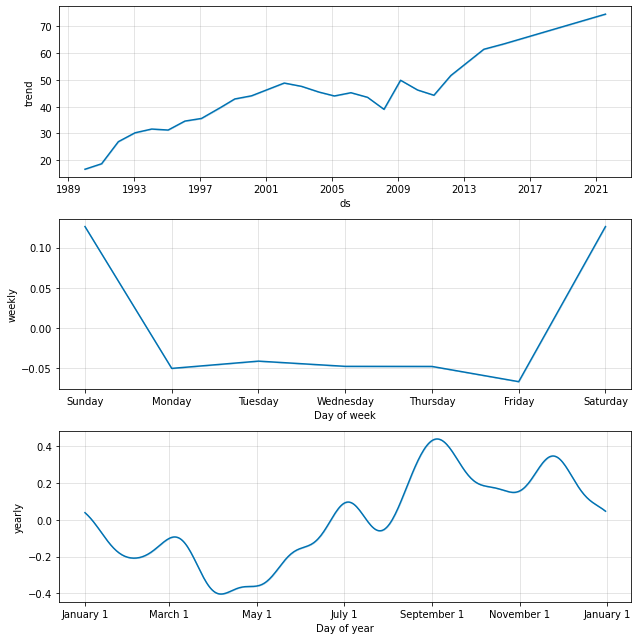

In [43]:
# Plot the components of the model
fig = model_.plot_components(prediction)

In [44]:
metric_df = prediction.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
8240,2021-07-21,74.507939,NaN
8241,2021-07-22,74.505842,NaN
8242,2021-07-23,74.486224,NaN
8243,2021-07-24,74.679598,NaN
8244,2021-07-25,74.681777,NaN


In [45]:
metric_df.dropna(inplace=True)

In [46]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=metric_df['y'],y_pred=metric_df['yhat'])

2.015558806602295

# CROSS VALIDATION

In [47]:
from fbprophet.diagnostics import cross_validation

In [57]:
df_cv=cross_validation(model,initial=' 9000 days',period='180 days',horizon='365 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2015-01-11 00:00:00 and 2018-06-24 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

In [58]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,63.553705,61.900314,65.232328,62.09,2015-01-11
1,2015-01-13,63.559133,61.962612,65.074309,61.97,2015-01-11
2,2015-01-14,63.550298,61.949074,65.085273,62.09,2015-01-11
3,2015-01-15,63.547916,61.950966,65.180195,62.06,2015-01-11
4,2015-01-16,63.524659,62.030469,65.186914,61.87,2015-01-11
...,...,...,...,...,...,...
2081,2019-06-18,70.475302,67.466615,73.322886,69.60,2018-06-24
2082,2019-06-19,70.487050,67.614617,73.424861,69.64,2018-06-24
2083,2019-06-20,70.506403,67.404446,73.482793,69.44,2018-06-24
2084,2019-06-21,70.506350,67.421377,73.528412,69.59,2018-06-24


In [59]:
from fbprophet.diagnostics import performance_metrics

In [60]:
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,10.059526,3.171676,2.512598,0.038855,0.033109,0.322115
1,38 days,10.070975,3.173480,2.517047,0.038919,0.033109,0.322115
2,39 days,10.190207,3.192210,2.531513,0.039140,0.033289,0.320513
3,40 days,10.270996,3.204839,2.531961,0.039153,0.032986,0.330128
4,41 days,10.484621,3.237996,2.558805,0.039570,0.033109,0.331731


In [61]:
df_p.mean()

horizon     201 days 00:00:00
mse                 18.626618
rmse                 4.278982
mae                  3.460599
mape                 0.052642
mdape                0.043058
coverage             0.376447
dtype: object

In [62]:
from fbprophet.plot import plot_cross_validation_metric

C:\Users\MMM-SM\anaconda3\envs\forecasting project\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\MMM-SM\anaconda3\envs\forecasting project\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


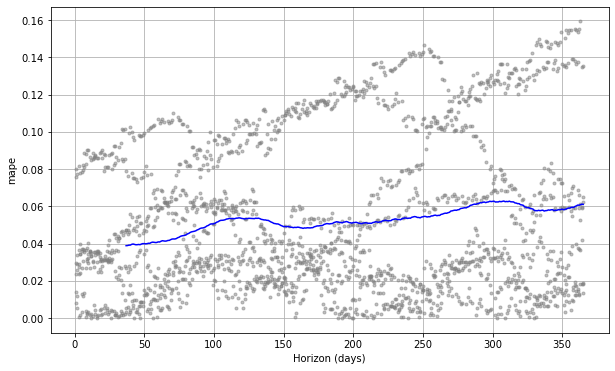

In [64]:
plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

# HyperParameter Tuning using ParameterGrid

* `n_changepoints`- is the number of change happen in the data. Prophet model detects them by its own. By default, its value is 25, which are uniformly placed in the first 80% of the time series.

* `changepoint_prior_scale` - to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If you make it high it will be more flexible, but you can end up overfitting. By default, this parameter is set to 0.05

In [97]:
import random

In [98]:
from sklearn.model_selection import ParameterGrid
params_grid = {'changepoint_prior_scale':[0.05,0.095,0.1,0.2],'n_changepoints' : [30,35,40,45,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 20


# Prophet Model Tuning

In [99]:
df=df.reset_index()
df.head()

,level_0,index,ds,y,date,is_holiday
0,0,0,1990-01-01,16.96,1990-01-01,True
1,1,1,1990-01-02,16.96,1990-01-02,False
2,2,2,1990-01-03,16.99,1990-01-03,False
3,3,3,1990-01-04,16.94,1990-01-04,False
4,4,4,1990-01-05,16.93,1990-01-05,False


In [100]:
train=train.reset_index()

In [101]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [102]:
import numpy as np

In [103]:
strt='2019-01-01'
end='2021-06-25'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    model=Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],interval_width=0.95)
    model.fit(df)
    future_global=model.make_future_dataframe(periods=30,freq='D')
    prediction1=model.predict(future_global)
    prediction1[['ds','yhat','yhat_lower','yhat_upper']].tail()
    metric_df1 = prediction1.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
    metric_df1.tail()
    metric_df1.dropna(inplace=True)
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    MAPE=mean_absolute_percentage_error(y_true=metric_df1['y'],y_pred=metric_df1['yhat'])
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.05, 'n_changepoints': 30}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.9631522715421492
{'changepoint_prior_scale': 0.05, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.834441809088236
{'changepoint_prior_scale': 0.05, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.765027563306919
{'changepoint_prior_scale': 0.05, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7374081504198648
{'changepoint_prior_scale': 0.05, 'n_changepoints': 50}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7062186961283503
{'changepoint_prior_scale': 0.095, 'n_changepoints': 30}
Mean Absolute Percentage Error(MAPE)------------------------------------ 1.9002451334399686
{'changepoint_prior_scale': 0.095, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7731305829080526
{'changepoint_prior_scale': 0.095, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.666817286375843
{'changepoint_prior_scale': 0.095, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.605679282394
{'changepoint_prior_scale': 0.095, 'n_changepoints': 50}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.5503535342012238
{'changepoint_prior_scale': 0.1, 'n_changepoints': 30}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.8968531830980753
{'changepoint_prior_scale': 0.1, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7712802845609925
{'changepoint_prior_scale': 0.1, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.663020676375477
{'changepoint_prior_scale': 0.1, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.6014114197204294
{'changepoint_prior_scale': 0.1, 'n_changepoints': 50}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.5374502548319378
{'changepoint_prior_scale': 0.2, 'n_changepoints': 30}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.886808943314179
{'changepoint_prior_scale': 0.2, 'n_changepoints': 35}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.7476377865189585
{'changepoint_prior_scale': 0.2, 'n_changepoints': 40}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.6369770355507456
{'changepoint_prior_scale': 0.2, 'n_changepoints': 45}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.5606724880642588
{'changepoint_prior_scale': 0.2, 'n_changepoints': 50}
Mean Absolute Percentage Error(MAPE)------------------------------------ 1.4999304686866908


In [104]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()  

,MAPE,Parameters
0,1.499930,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
1,1.537450,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."
2,1.550354,"{'changepoint_prior_scale': 0.095, 'n_changepo..."
3,1.560672,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
4,1.601411,"{'changepoint_prior_scale': 0.1, 'n_changepoin..."


Out of total 15 models, we will select the parameters which has the least MAPE to train the final model and predict the next 30 days Dollar Exchange Rates.

In [105]:
#Training model with  changepoint_prior_scale 0.3 and n_changepoints=200

In [106]:
final_model_ = Prophet(changepoint_prior_scale=0.2,n_changepoints=50)
final_model_.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [107]:
final_future=final_model_.make_future_dataframe(periods=30,freq='D')

In [108]:
final_prediction=final_model_.predict(final_future)
final_prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8240,2021-07-21,74.377350,72.978317,75.859783
8241,2021-07-22,74.375141,72.910807,75.757489
8242,2021-07-23,74.355535,72.929903,75.906236
8243,2021-07-24,74.129625,72.652863,75.521198
8244,2021-07-25,74.131543,72.757211,75.572485


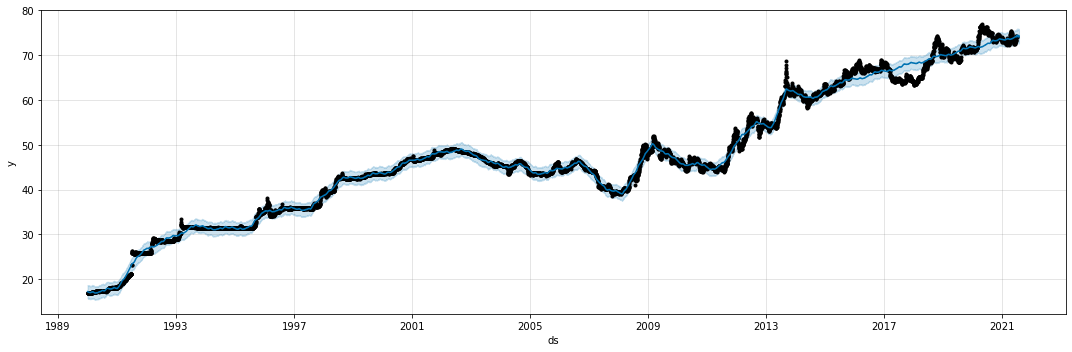

In [109]:
# Plot the forecast
# prior scale 0.095
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig =final_model_.plot(final_prediction,
                 ax=ax)
plt.show()

In [110]:
from fbprophet.plot import add_changepoints_to_plot

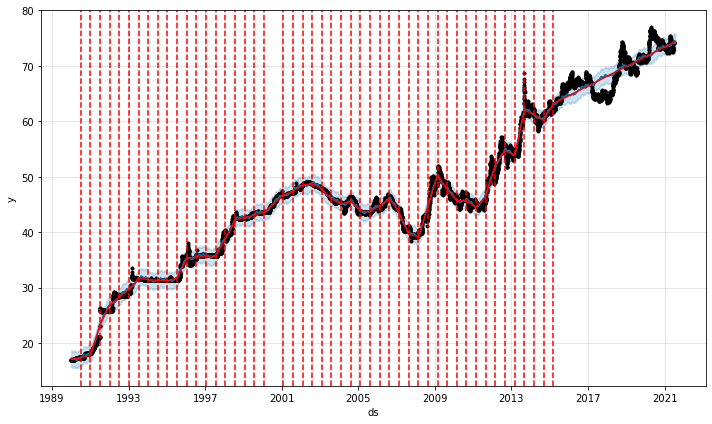

In [111]:
fig=final_model_.plot(final_prediction)
a=add_changepoints_to_plot(fig.gca(),final_model_,final_prediction)

In [112]:
final_metric_df = final_prediction.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
final_metric_df.tail()

,ds,yhat,y
8240,2021-07-21,74.377350,NaN
8241,2021-07-22,74.375141,NaN
8242,2021-07-23,74.355535,NaN
8243,2021-07-24,74.129625,NaN
8244,2021-07-25,74.131543,NaN


In [113]:
final_metric_df.dropna(inplace=True)

In [114]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=final_metric_df['y'],y_pred=final_metric_df['yhat'])

1.4999304686866908

# Conclusion

We have achieved the MAPE score of 1.49 on the overall data which seems to be good. However, we shall decide on the model after comparing with other models.